In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X = pd.read_csv("logisticX.csv")
Y = pd.read_csv("logisticY.csv")
rows,col = X.shape

feature_1 = X.iloc[:,0]
mean1 = np.mean(feature_1,axis=0)
std_dev1 = np.std(feature_1)

feature_2 = X.iloc[:,1]
mean2 = np.mean(feature_1,axis=0)
std_dev2 = np.std(feature_2)



feature_1 = np.array([(feature_1-mean1)/std_dev1]).transpose()
feature_2 = np.array([(feature_2-mean2)/std_dev2]).transpose()
ones = np.ones((rows,1))
data = np.append(ones,feature_1,axis=1)
data = np.append(data,feature_2,axis=1)

X = data


,0
0,0
1,0
2,0
3,0
4,0
...,...
94,1
95,1
96,1
97,1


In [3]:
# calculating Hessian.
def h(x,theta):
    vector = np.dot(x,theta)
    value = 1/(1+np.exp(-vector))
    return value




def Hessian(x,theta):
    arr = h(x,theta)*(1-h(x,theta))
    vector = np.array(arr[:,0])
    D = np.diag(vector)
    ##D is 99*99
    D = np.dot(x.transpose(),D)
    #x.transpose() = 3*99, * D (99*99) = Result(3*99)
    hessian = np.dot(D,x)
    #D(3*99) x(99*3)= hessian(3*3)
    return hessian 
                      
                      
                      

# Finding Gradient of L
def grad_L(x,y,theta):
    h_theta = h(x,theta)
    diff = (y-h_theta)
    #x.T is 3*100, diff = 100*1, gradient = 3*1
    gradient = np.dot(x.transpose(),diff)
    return gradient

In [7]:
#Implementing Newton's Method
Theta = np.array([[0,0,0]]).transpose()
hessian_inv = np.linalg.inv(Hessian(X,Theta))
gradient_L = grad_L(X,Y,Theta)
Theta_new = Theta + np.dot(hessian_inv,gradient_L)
print(Theta_new)

[[-0.04698448]
 [ 0.88511771]
 [-0.9360747 ]]


# Plot the training data (your axes should be x1 and x2 , corresponding to the two coordinates of the inputs, and you should use a different symbol for each point plotted to indicate whether that example had label 1 or 0). Also plot on the same figure the decision boundary fit by logistic regression. (i.e., this should be a straight line showing the boundary separating the region where h(x) > 0.5 from where h(x) ≤ 0.5.)

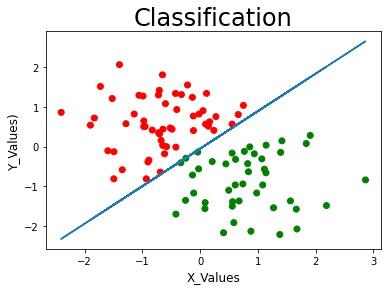

In [13]:
prediction = h(X,Theta_new)
theta_0 = Theta_new[0][0]
theta_1 = Theta_new[1][0]
theta_2 = Theta_new[2][0]

y_plot = -((theta_0+theta_1*feature_1)/theta_2)

colors = {0:'red', 1:'green'}
markers = {0:'*',1:'^'}


def change(vector):
    for i in range(0,vector.size):
        if(vector[i]<0.5):
            vector[i]=0
        else:
            vector[i]=1
    return vector
vec = change(prediction)
df = pd.DataFrame(vec,columns=['prediction'])

plt.scatter(feature_1, feature_2, c=df['prediction'].map(colors))
plt.plot(feature_1,y_plot)
plt.xlabel( "X_Values" , size = 12 )
plt.ylabel( "Y_Values)" , size = 12 )
plt.title( "Classification" , size = 24 )
plt.show()


TypeError: cannot unpack non-iterable AxesSubplot object

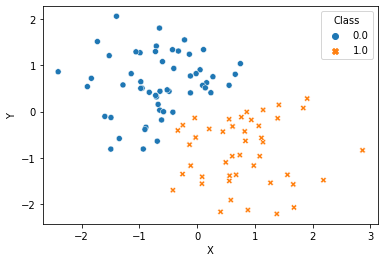

In [20]:
def prediction_fun(X_test):
    return h(X_test,Theta_new)
    

In [ ]:
import seaborn as sns
data_f=pd.DataFrame(np.column_stack((feature_1,feature_2,prediction)),columns=['X','Y','Class'])
data_f2 = data_f
data_f2['y']= y_plot

#df1 = sns.load_dataset("data_f")
f,ax = sns.scatterplot(data=data_f,x="X",y="Y",hue="Class",style="Class")
sns.lineplot(data=data_f2, x="X", y="y",color='green')

